# Problem 3

#### submitted by Amin Shojaeighadikolaei

##### Problem 3 Use the Lab 2 file, although you may significantly reduce the size of the training data set.

- Find the optimal number of neurons in the mlp model with a single hidden layer. Reserve 25% of the training data for validation. Using MatPlotLib, plot the loss and validation loss against the number of epochs in five cases: very large model, large model, optimal model, small model, too small model.
- Repeat part I to find the optimal mlp with two hidden layers. Assume the same number of neurons in the two hidden layers.
- Compare the two optimal models obtained in parts I and II by evaluating them on the test set.

In this problem I want to create a MLP model on MNIST dataset. At first libraries are imported. Then there are some class and functions(def) which are defined.

##### Class myCallback :

In Keras, Callback is a python class meant to be subclassed to provide specific functionality, with a set of methods called at various stages of training (including batch/epoch start and ends), testing, and predicting. Callbacks are useful to get a view on internal states and statistics of the model during training. it will stop the training when the accuracy reach to the ACCURACY_THRESHOLD = 0.99". 

##### def one_hot_encode:

This function is for one hot encode. Actually, when we want to calculate evaluation manually, since the output of the dataset is categorical, we need to use one hot encoding for the output.

##### def create_model:

Since in this problem I want to find the optimal hidden layer and optimal nodes for hidden layer, I have to create NN model several times. In hence, for doing this efficiently, I defined the create model as a function.

#### Architecture:

###### how many hidden layers to actually have in the neural network and how many neurons will be in each of these layers. 

In related to number of hidden layer, one hidden layer can approximate any function that contains a continuous mapping from one finite space to another. Two hidden layer can represent an arbitrary decision boundary to arbitrary accuracy wit hrational activation functions and can approximate any smooth mapping to any accuracy.Problems that require more than two hidden layers were rare prior to deep learning. Two or fewer layers will often suffice with simple data sets.


Deciding the number of neurons in the hidden layers is a very important part of deciding your overall neural network architecture. Some books and articles offer "rules of thumb" for choosing an architecture.

- A rule of thumb is for the size of this [hidden] layer to be somewhere
   between the input layer size ... and the output layer size ..." (Blum,
   1992, p. 60).
- To calculate the number of hidden nodes we use a general rule of:
   (Number of inputs + outputs) * (2/3)" (from the FAQ for a commercial
   neural network software company). 
- you will never require more than twice the number of hidden units as you
   have inputs" in an MLP with one hidden layer (Swingler, 1996, p. 53). See
   the section in Part 4 of the FAQ on The Worst books for the source of
   this myth.) 
- "How large should the hidden layer be? One rule of thumb is that it
   should never be more than twice as large as the input layer." (Berry and
   Linoff, 1997, p. 323). 
- "Typically, we specify as many hidden nodes as dimensions [principal
   components] needed to capture 70-90% of the variance of the input data
   set." (Boger and Guterman, 1997) 
   
These are just some examples of some rules of thumb. But actually, there is not a powerful method to determine the exact number of the hidden layer and nodes. Because it depends on number of training cases, the amount of noise in the targets and the complexity of the problem. Since the MNIST dataset is not a complex dataset, we can simulate and find the optimal nourons.

In hence, in this project, in simulation I , I created MLP model 5 times with one hidden layer based on layers = [ [5] ,[20],[200], [1000],[5000] ] .

In simulation II , I created MLP models 5 times with 2 hidden layers with same number of nourons based on layers = [ [5,5] ,[20,20],[100,100], [500,500],[1500,1500] ]. 








In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
print(tf.__version__)

2.2.0-dev20200411


In [2]:
ACCURACY_THRESHOLD = 0.99
class myCallback (tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > ACCURACY_THRESHOLD):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
            self.model.stop_training = True

In [3]:

def one_hot_encode(Y) :
    Output=[]
    for y in Y:
        if y == [0]:
            y = [1,0,0,0,0,0,0,0,0,0]
        elif y==[1]:
            y = [0,1,0,0,0,0,0,0,0,0]
        elif y==[2]:
            y = [0,0,1,0,0,0,0,0,0,0]
        elif y==[3]:
            y = [0,0,0,1,0,0,0,0,0,0]
        elif y==[4]:
            y = [0,0,0,0,1,0,0,0,0,0]
        elif y==[5]:
            y = [0,0,0,0,0,1,0,0,0,0]
        elif y==[6]:
            y = [0,0,0,0,0,0,1,0,0,0]
        elif y==[7]:
            y = [0,0,0,0,0,0,0,1,0,0]
        elif y==[8]:
            y = [0,0,0,0,0,0,0,0,1,0]
        elif y==[9]:
            y = [0,0,0,0,0,0,0,0,0,1]
        Output.append(y)
    return Output

In [4]:
def create_model ( layers):
    model=tf.keras.models.Sequential()
    model.add( tf.keras.layers.Flatten(input_shape=(28, 28)) )
    for i, nodes in enumerate(layers):
        model.add( tf.keras.layers.Dense(nodes, activation='relu') )
    model.add( tf.keras.layers.Dense(10, activation='softmax') )
    
    model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
    
    return model

Now it is time to load the dataset. The training input size is (60000,28,28) and test input size is (10000,28,28).25% of the training set is considered as validation set. In hence, 15000 images assumed as validation.

In [5]:
(images_train, labels_train), (images_test, labels_test) = tf.keras.datasets.mnist.load_data()
images_train, images_test = images_train/255.0, images_test/255.0

x_val = images_train[-15000:]
y_val = labels_train[-15000:]
images_train = images_train[:-15000]
labels_train = labels_train[:-15000]

layers = [ [5] ,[20],[200], [1000],[5000] ]
callbacks = myCallback()
LOSS = []


### Main I ( one hidden layer)


In [6]:
test_loss_total_1=[]
test_accuracy_total_1=[]
for i in layers:
    mlp= create_model(i)
    print('Simulation for '+str(i)+' layer: ')
    
 
    history= mlp.fit(images_train, labels_train,validation_data=(x_val,y_val), epochs=10,verbose=2,callbacks=[callbacks])
    
    # convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history)
    loss=hist_df.to_numpy()
    LOSS.append(loss)
    Looss= np.array(LOSS)
    
    test_loss_1 , test_accuracy_1 = mlp.evaluate(images_test, labels_test, verbose=1)
    test_loss_total_1.append(test_loss_1)
    test_accuracy_total_1.append(test_accuracy_1)
    

Simulation for [5] layer: 
Epoch 1/10
1407/1407 - 2s - loss: 1.0917 - accuracy: 0.6430 - val_loss: 0.7542 - val_accuracy: 0.7805
Epoch 2/10
1407/1407 - 1s - loss: 0.6419 - accuracy: 0.8161 - val_loss: 0.5272 - val_accuracy: 0.8467
Epoch 3/10
1407/1407 - 1s - loss: 0.5065 - accuracy: 0.8573 - val_loss: 0.4583 - val_accuracy: 0.8679
Epoch 4/10
1407/1407 - 1s - loss: 0.4574 - accuracy: 0.8726 - val_loss: 0.4257 - val_accuracy: 0.8741
Epoch 5/10
1407/1407 - 1s - loss: 0.4296 - accuracy: 0.8812 - val_loss: 0.4076 - val_accuracy: 0.8796
Epoch 6/10
1407/1407 - 1s - loss: 0.4113 - accuracy: 0.8854 - val_loss: 0.3952 - val_accuracy: 0.8853
Epoch 7/10
1407/1407 - 1s - loss: 0.3984 - accuracy: 0.8891 - val_loss: 0.3807 - val_accuracy: 0.8901
Epoch 8/10
1407/1407 - 1s - loss: 0.3883 - accuracy: 0.8906 - val_loss: 0.3765 - val_accuracy: 0.8905
Epoch 9/10
1407/1407 - 1s - loss: 0.3799 - accuracy: 0.8934 - val_loss: 0.3787 - val_accuracy: 0.8880
Epoch 10/10
1407/1407 - 1s - loss: 0.3738 - accuracy: 0

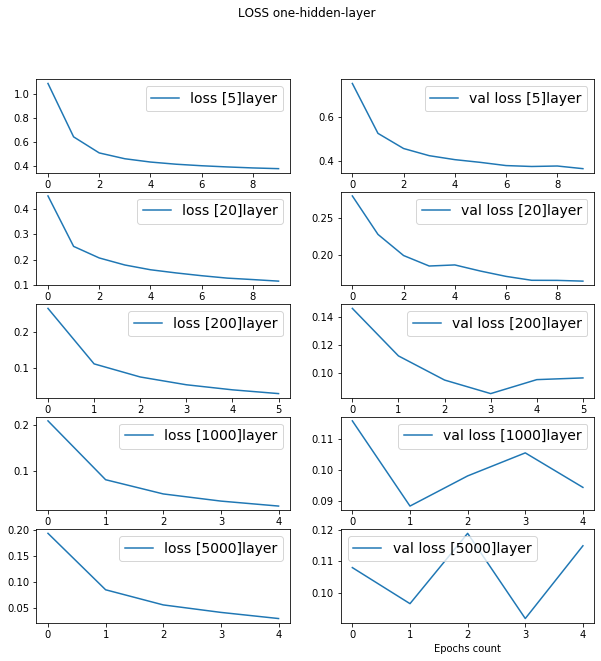

In [7]:
final_loss=[[] for i in range(len(layers))]
final_val_loss=[[] for i in range(len(layers))]
for i in range(len(layers)):
    for j in range(Looss[i].shape[0]):
        final_loss[i].append(Looss[i][j][0])
        final_val_loss[i].append(Looss[i][j][2])

fig, axs= plt.subplots(5,2 , figsize=(10,10))
fig.suptitle('LOSS one-hidden-layer')
plt.xlabel('Epochs count')
for i in range(len(layers)):
    
    axs[i,0].plot(final_loss[i],label='loss '+str(layers[i])+'layer')
    axs[i,0].legend(fontsize=14)
    axs[i,1].plot(final_val_loss[i],label='val loss '+str(layers[i])+'layer')
    axs[i,1].legend(fontsize=14)
#     axs[i,0].set_yticks(np.arange(0, 0.5, step=0.1))
#     axs[i,1].set_yticks(np.arange(0, 0.5, step=0.1))
plt.savefig('comparison for one hidden layer.png')
plt.show()

### Main II ( Two hidden layer)


In [8]:
layers = [ [5,5] ,[20,20],[100,100], [500,500],[1500,1500] ]
callbacks = myCallback()
LOSS = []
test_loss_total_2=[]
test_accuracy_total_2=[]
for i in layers:
    mlp= create_model(i)
    print('Simulation for '+str(i)+' layer: ')
    
 
    history= mlp.fit(images_train, labels_train,validation_data=(x_val,y_val), epochs=10,verbose=2,callbacks=[callbacks])
    
    # convert the history.history dict to a pandas DataFrame:     
    hist_df = pd.DataFrame(history.history)
    loss=hist_df.to_numpy()
    LOSS.append(loss)
    
    test_loss_2 , test_accuracy_2 = mlp.evaluate(images_test, labels_test, verbose=1)
    test_loss_total_2.append(test_loss_2)
    test_accuracy_total_2.append(test_accuracy_2)
    


Simulation for [5, 5] layer: 
Epoch 1/10
1407/1407 - 2s - loss: 1.5145 - accuracy: 0.4614 - val_loss: 1.1143 - val_accuracy: 0.6544
Epoch 2/10
1407/1407 - 2s - loss: 0.9580 - accuracy: 0.7186 - val_loss: 0.8240 - val_accuracy: 0.7829
Epoch 3/10
1407/1407 - 2s - loss: 0.7512 - accuracy: 0.7964 - val_loss: 0.7118 - val_accuracy: 0.8123
Epoch 4/10
1407/1407 - 2s - loss: 0.6729 - accuracy: 0.8194 - val_loss: 0.6605 - val_accuracy: 0.8272
Epoch 5/10
1407/1407 - 2s - loss: 0.6249 - accuracy: 0.8320 - val_loss: 0.6332 - val_accuracy: 0.8319
Epoch 6/10
1407/1407 - 2s - loss: 0.5944 - accuracy: 0.8397 - val_loss: 0.6059 - val_accuracy: 0.8429
Epoch 7/10
1407/1407 - 2s - loss: 0.5710 - accuracy: 0.8478 - val_loss: 0.5957 - val_accuracy: 0.8437
Epoch 8/10
1407/1407 - 1s - loss: 0.5548 - accuracy: 0.8502 - val_loss: 0.5833 - val_accuracy: 0.8476
Epoch 9/10
1407/1407 - 2s - loss: 0.5408 - accuracy: 0.8554 - val_loss: 0.5742 - val_accuracy: 0.8514
Epoch 10/10
1407/1407 - 2s - loss: 0.5309 - accuracy

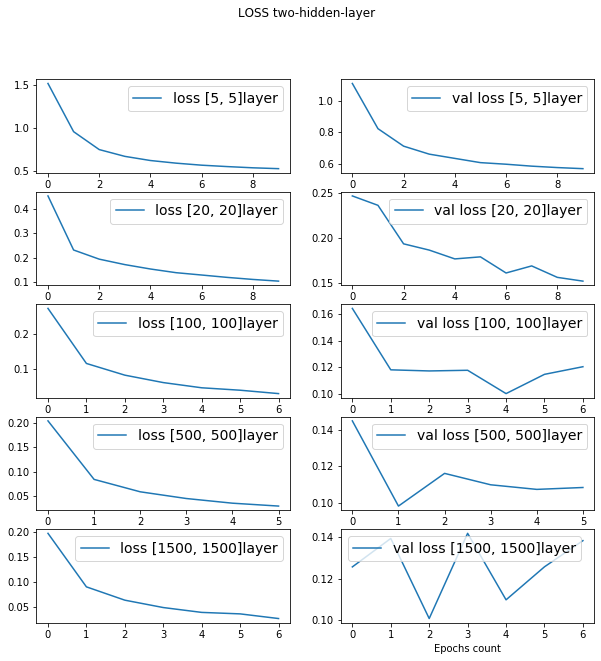

In [9]:

# LOSS
# loss.shape
Looss= np.array(LOSS)
final_loss=[[] for i in range(len(layers))]
final_val_loss=[[] for i in range(len(layers))]
for i in range(len(layers)):
    for j in range(Looss[i].shape[0]):
        final_loss[i].append(Looss[i][j][0])
        final_val_loss[i].append(Looss[i][j][2])
   
fig, axs= plt.subplots(5,2 , figsize=(10,10))
fig.suptitle('LOSS two-hidden-layer')

plt.xlabel('Epochs count')
for i in range(len(layers)):
    
    axs[i,0].plot(final_loss[i],label='loss '+str(layers[i])+'layer')
    axs[i,0].legend(fontsize=14)
    axs[i,1].plot(final_val_loss[i],label='val loss '+str(layers[i])+'layer')
    axs[i,1].legend(fontsize=14)

plt.savefig('comparison for two hidden layer.png')
plt.show()

### Compare by Test:

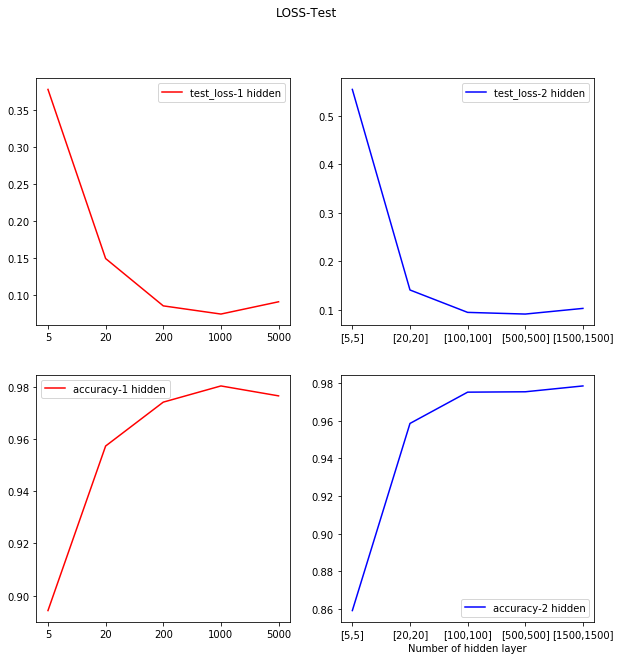

In [10]:
one_hidden_layer=['5','20','200','1000','5000']
thow_hidden_layer=['[5,5]','[20,20]','[100,100]','[500,500]','[1500,1500]']
fig, axs= plt.subplots(2,2, figsize=(10,10))
fig.suptitle('LOSS-Test')


axs[0,0].plot(one_hidden_layer,test_loss_total_1, color='red',label='test_loss-1 hidden')
axs[0,0].legend()
axs[1,0].plot(one_hidden_layer,test_accuracy_total_1, color='red',label='accuracy-1 hidden')
axs[1,0].legend()


axs[0,1].plot(thow_hidden_layer,test_loss_total_2, color='blue',label='test_loss-2 hidden')
axs[0,1].legend()
axs[1,1].plot(thow_hidden_layer,test_accuracy_total_2, color='blue',label='accuracy-2 hidden')
axs[1,1].legend()

plt.xlabel('Number of hidden layer')
plt.savefig('comparison for test.png')
plt.show()


### Conclusion:

##### Simulation Main I( one hidden layer):
loss and accuracy for 5 one-hidden-layer cases is provided. for too small, small, optimal, large and too large case. As it shown:

for too small case(5 neurons): loss and validation loss still is too large. In addition , in this case all 10 epochs is simulated and it means the accuracy is not reach to the threshold. this is not a good choice.

for case large(20 neurons): Although loss and validation loss are in good condition,still the accuracy does not reach to the threshold. this is not a good choice too.

For case optimal(200 neurons): Loss and validation loss are small enough and the network reach to 99% accuracy after 6 epochs. This is a good choice. later we can see the loss and accuracy of the test and that would prove this optimal choice.

For case large(1000 neurons): Although the time of the simulation increased, there is not any improvement.

For case too large(5000): not only loss and epoch numbers are not improved, but also simulation time increased and it is not a good choice.


##### Simulation Main II( two hidden layer):

Same approach is proposed and loss and accuracy for 5 two-hidden-layer cases is provided. 

For too small case([5]): Loss and validation loss are too large and accuracy is below 99%. This is not a good choice.

For small case([20,20]):  Although loss and validation loss are in good condition,still the accuracy does not reach to the threshold. this is not a good choice too.

For optimal case([100,100]): Loss and validation loss are small enough and the network reach to 99% accuracy after 6 epochs. This can be a good choice. 

For large case([500,500]): No improvement. Simulation time is too large

For too large case([1500,1500]): Simulation time is too large. In addition, no improvement can be seen.

From the last picture, we can see the evaluation parameters ( test_loss & test_accuracy) are good for both optimal case. As it shown, the optimal one hidden layer can be a better choice since MNIST dataset is a simple dataset and with one hidden layer(200 neurons) loss and acuuracy is good for validation and evaluation. In addition, one hidden layer is more faster that 2 hidden layer.